In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [3]:
train_df.shape, test_df.shape

((31647, 18), (13564, 17))

In [4]:
print('Number of Samples : ', len(train_df),len(test_df))

Number of Samples :  31647 13564


In [6]:
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [7]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
train_df.groupby('subscribed').size()

subscribed
no     27932
yes     3715
dtype: int64

In [10]:
train_df['Output_Label']=(train_df.subscribed == 'yes').astype('int')

In [12]:
def calc_prevalence(subscribed_actual):
    return(sum(subscribed_actual)/len(subscribed_actual))

In [14]:
print ('Prevalance of the positive class: %.3f'%calc_prevalence(train_df['Output_Label'].values))

Prevalance of the positive class: 0.117


In [15]:
train_df[list(train_df.columns)[:10]].head()

,ID,age,job,marital,education,default,balance,housing,loan,contact
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone
1,40576,31,unknown,married,secondary,no,3,no,no,cellular
2,15320,27,services,married,secondary,no,891,yes,no,cellular
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular
4,29842,31,technician,married,secondary,no,119,yes,no,cellular


In [16]:
train_df[list(train_df.columns)[10:]].head()

,day,month,duration,campaign,pdays,previous,poutcome,subscribed,Output_Label
0,19,nov,44,2,-1,0,unknown,no,0
1,20,jul,91,2,-1,0,unknown,no,0
2,18,jul,240,1,-1,0,unknown,no,0
3,22,jun,867,1,84,3,success,yes,1
4,4,feb,380,1,-1,0,unknown,no,0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            31647 non-null  int64 
 1   age           31647 non-null  int64 
 2   job           31647 non-null  object
 3   marital       31647 non-null  object
 4   education     31647 non-null  object
 5   default       31647 non-null  object
 6   balance       31647 non-null  int64 
 7   housing       31647 non-null  object
 8   loan          31647 non-null  object
 9   contact       31647 non-null  object
 10  day           31647 non-null  int64 
 11  month         31647 non-null  object
 12  duration      31647 non-null  int64 
 13  campaign      31647 non-null  int64 
 14  pdays         31647 non-null  int64 
 15  previous      31647 non-null  int64 
 16  poutcome      31647 non-null  object
 17  subscribed    31647 non-null  object
 18  Output_Label  31647 non-null  int32 
dtypes: i

In [20]:
print('Number of columns : ', len(train_df.columns))

Number of columns :  19


In [21]:
for a in list(train_df.columns):
    n = train_df[a].unique()
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ':' + str(len(n))+'unique values')

ID:31647unique values
age:76unique values
job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
balance:6326unique values
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
day:31unique values
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
duration:1454unique values
campaign:45unique values
pdays:509unique values
previous:38unique values
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']
Output_Label
[0 1]


In [30]:
cols_num = ['campaign','pdays','previous','age','balance','day','duration']
train_df[cols_num].head()

,campaign,pdays,previous,age,balance,day,duration
0,2,-1,0,56,1933,19,44
1,2,-1,0,31,3,20,91
2,1,-1,0,27,891,18,240
3,1,84,3,57,3287,22,867
4,1,-1,0,31,119,4,380


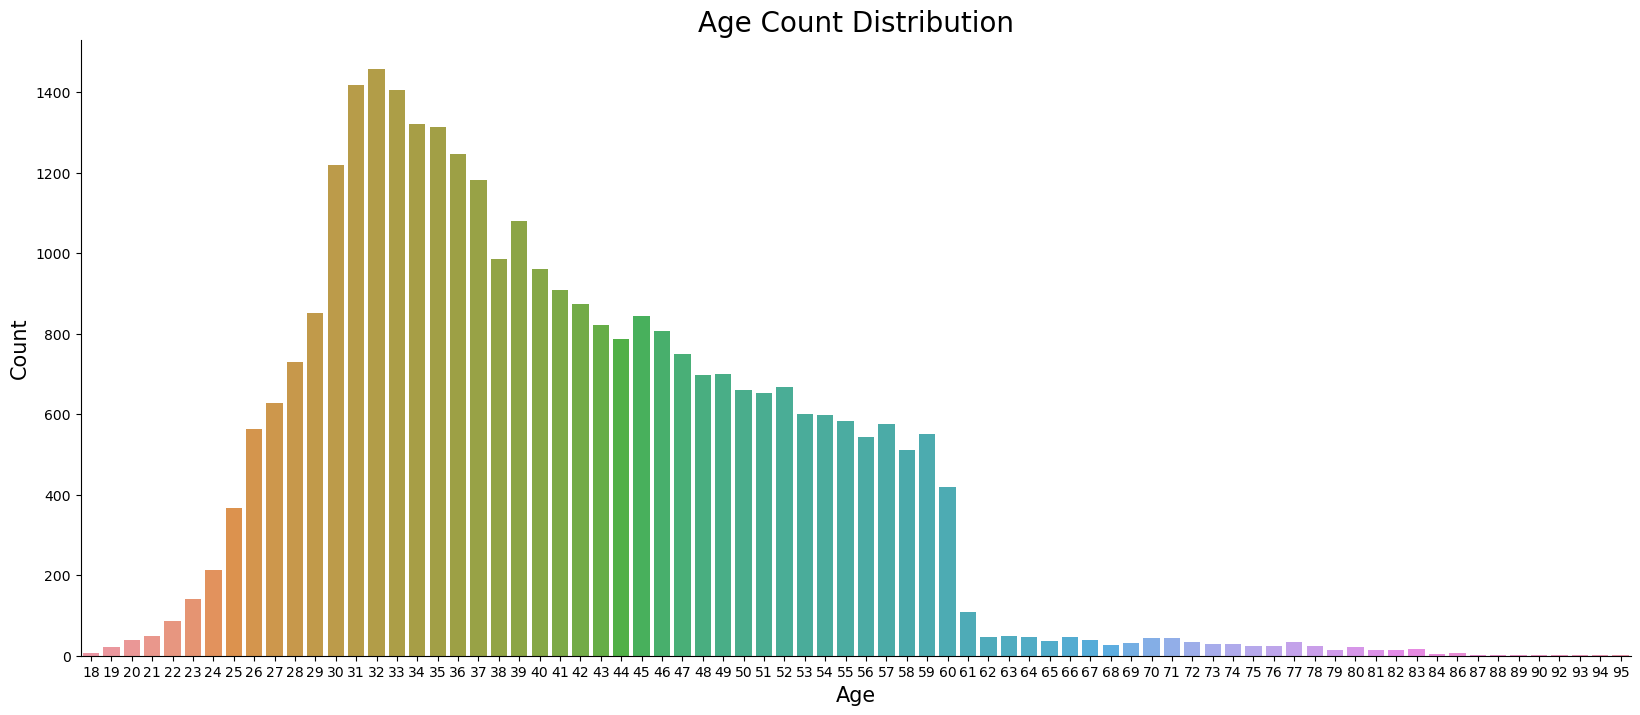

In [31]:
fig,ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = train_df[cols_num])
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 20)
sns.despine()

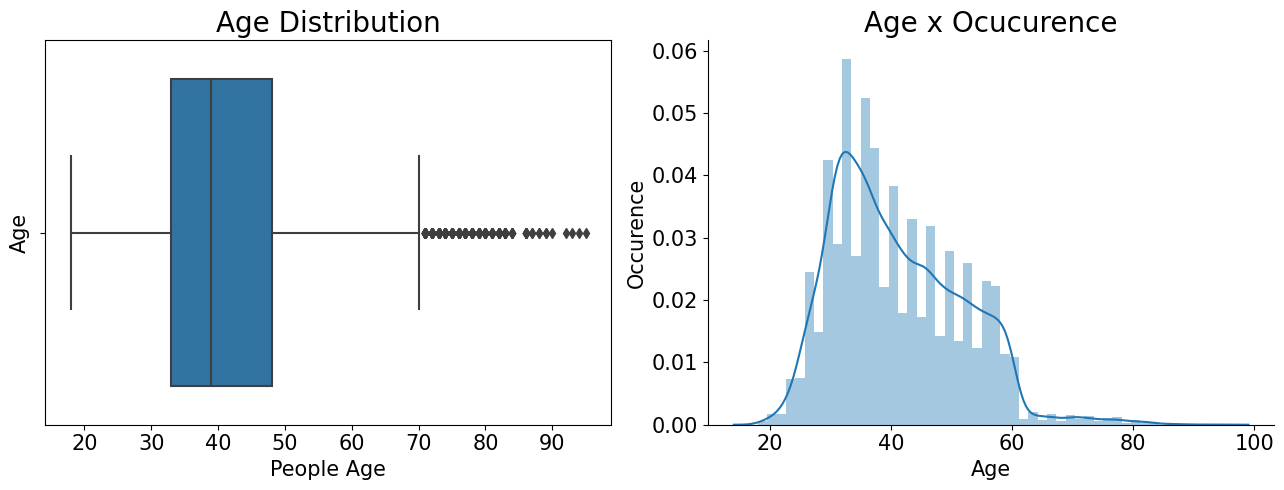

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = train_df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=20)
ax1.tick_params(labelsize=15)

sns.distplot(train_df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=20)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

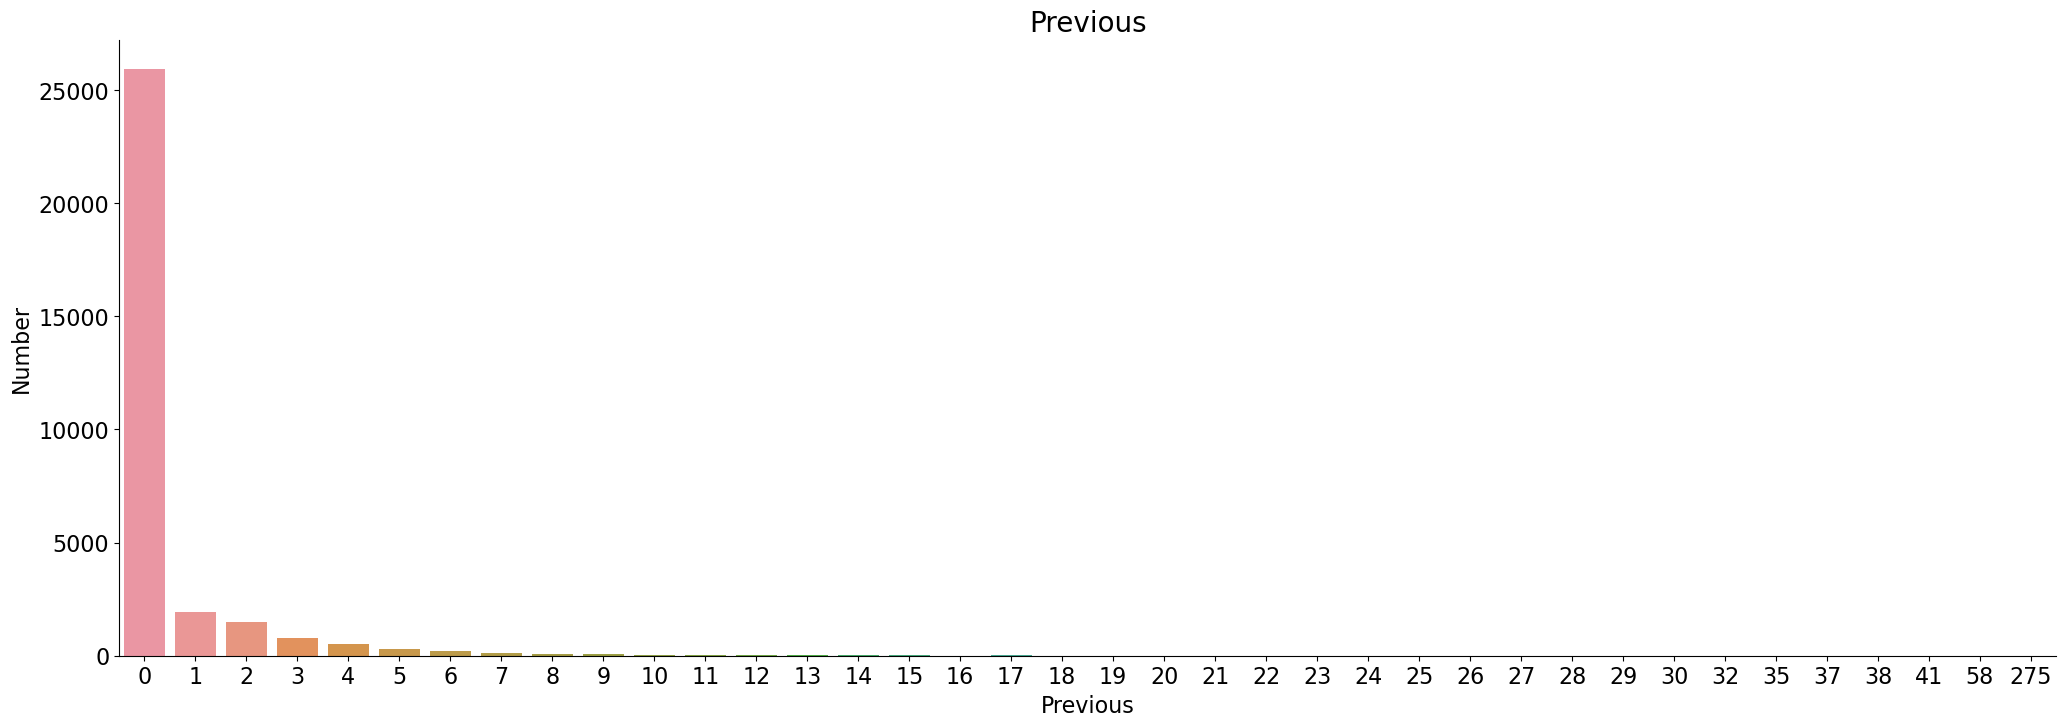

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = train_df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

In [28]:
train_df[cols_num].isnull().sum()

campaign    0
pdays       0
previous    0
age         0
balance     0
dtype: int64

In [34]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,Output_Label
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,0


In [35]:
cols_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']

In [36]:
train_df[cols_cat].isnull().sum()

job           0
marital       0
education     0
default       0
housing       0
loan          0
contact       0
month         0
poutcome      0
subscribed    0
dtype: int64

In [38]:
cols_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
train_df[cols_cat]
cols_new_cat = pd.get_dummies(train_df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed_no,subscribed_yes
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False


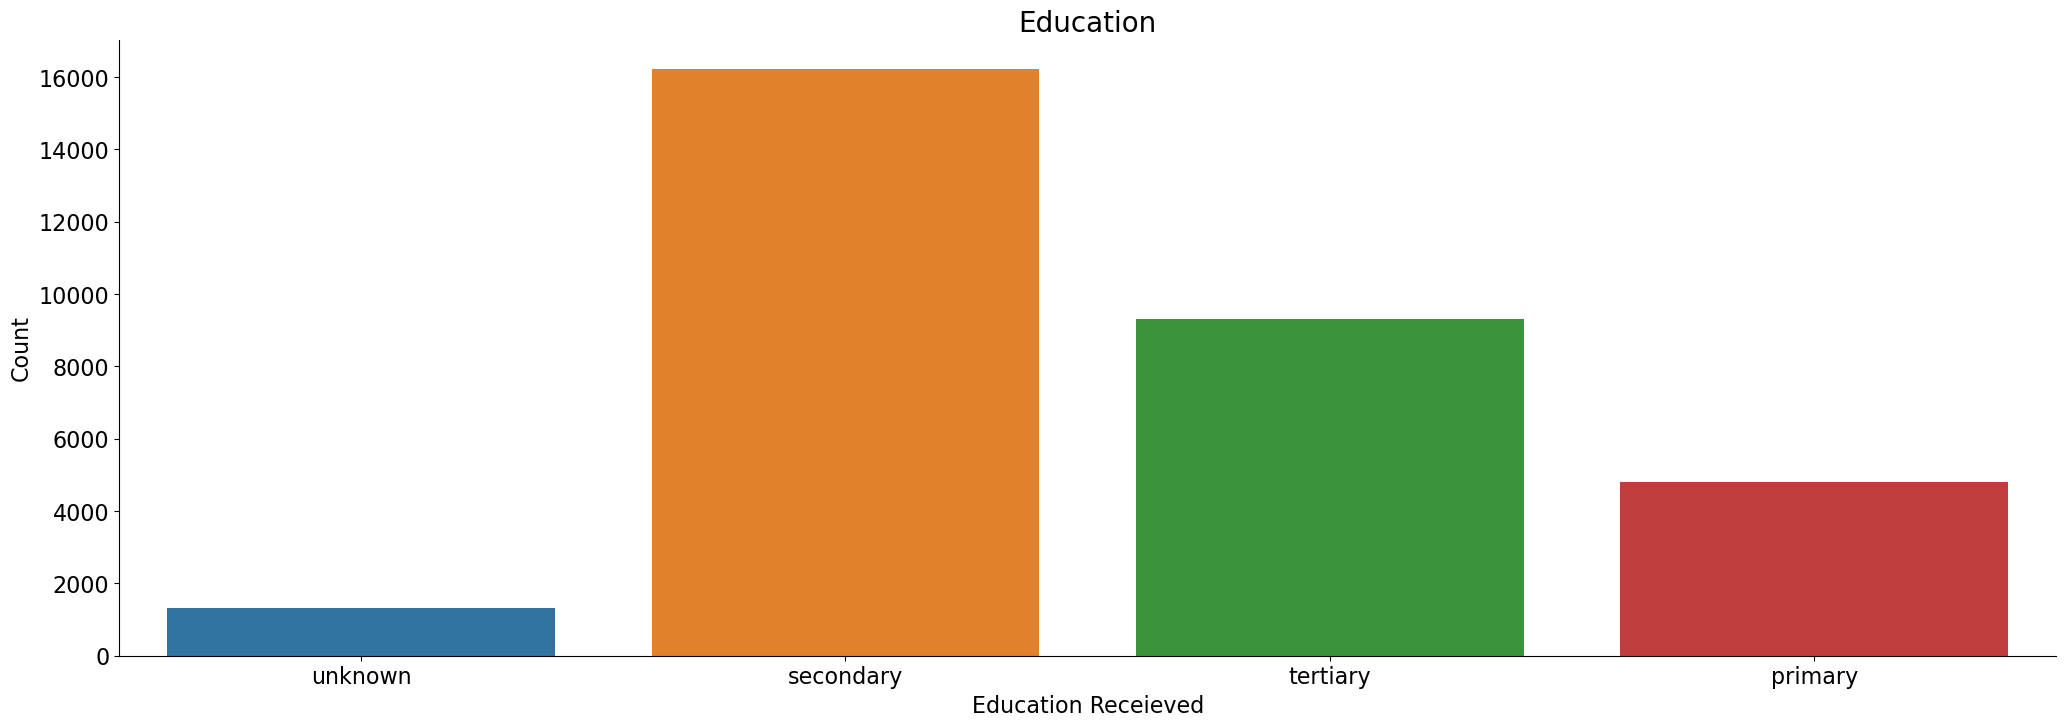

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = train_df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

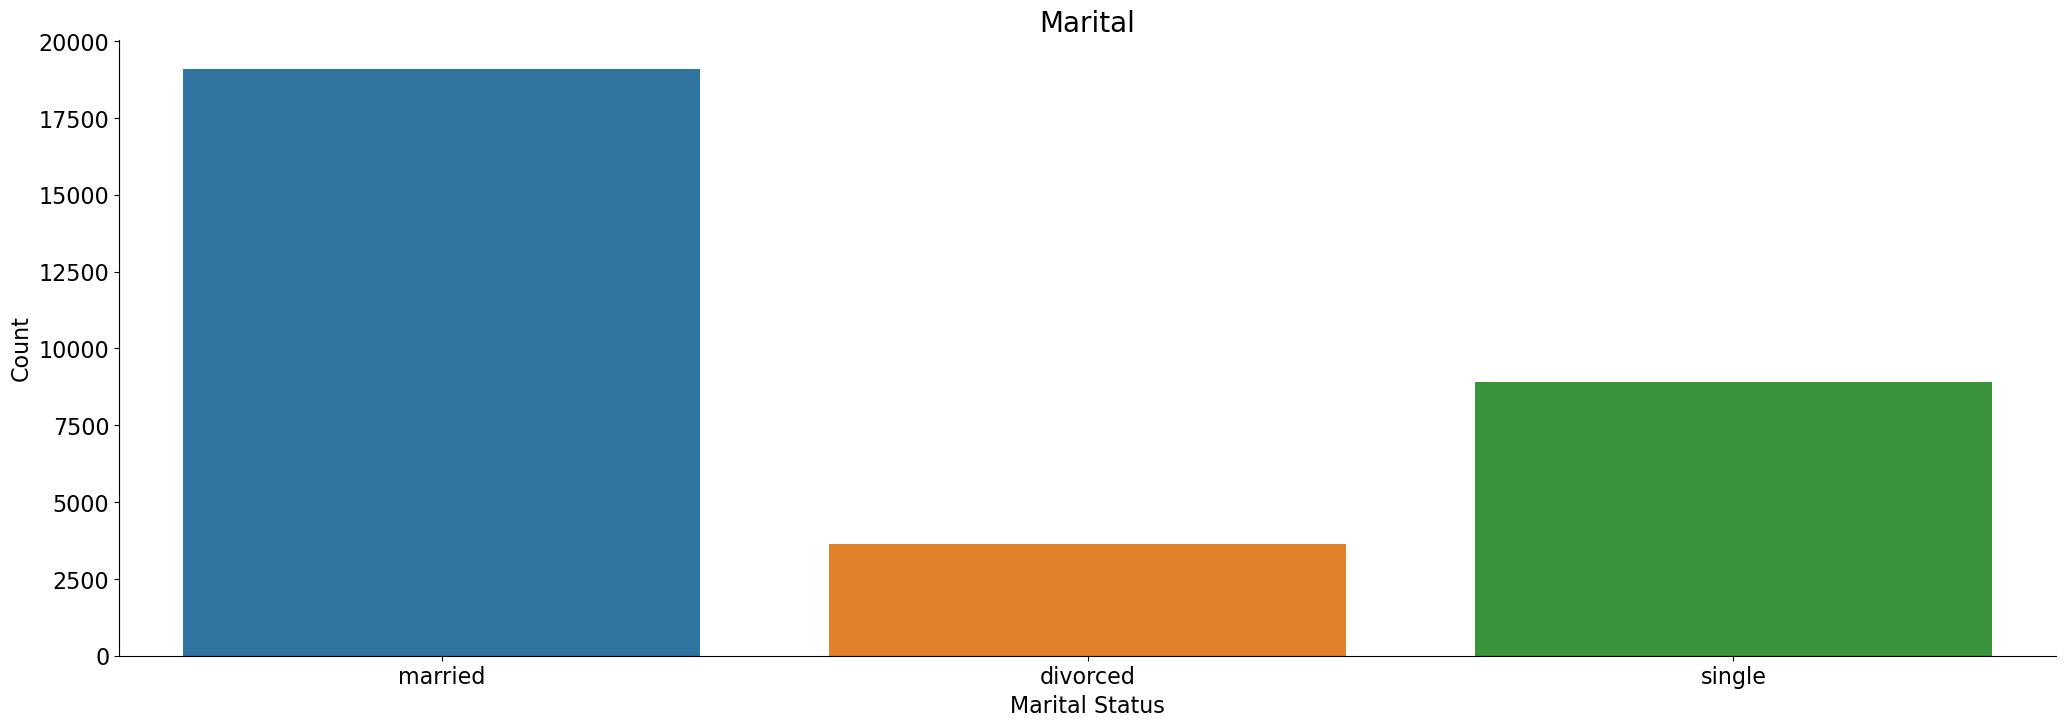

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = train_df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

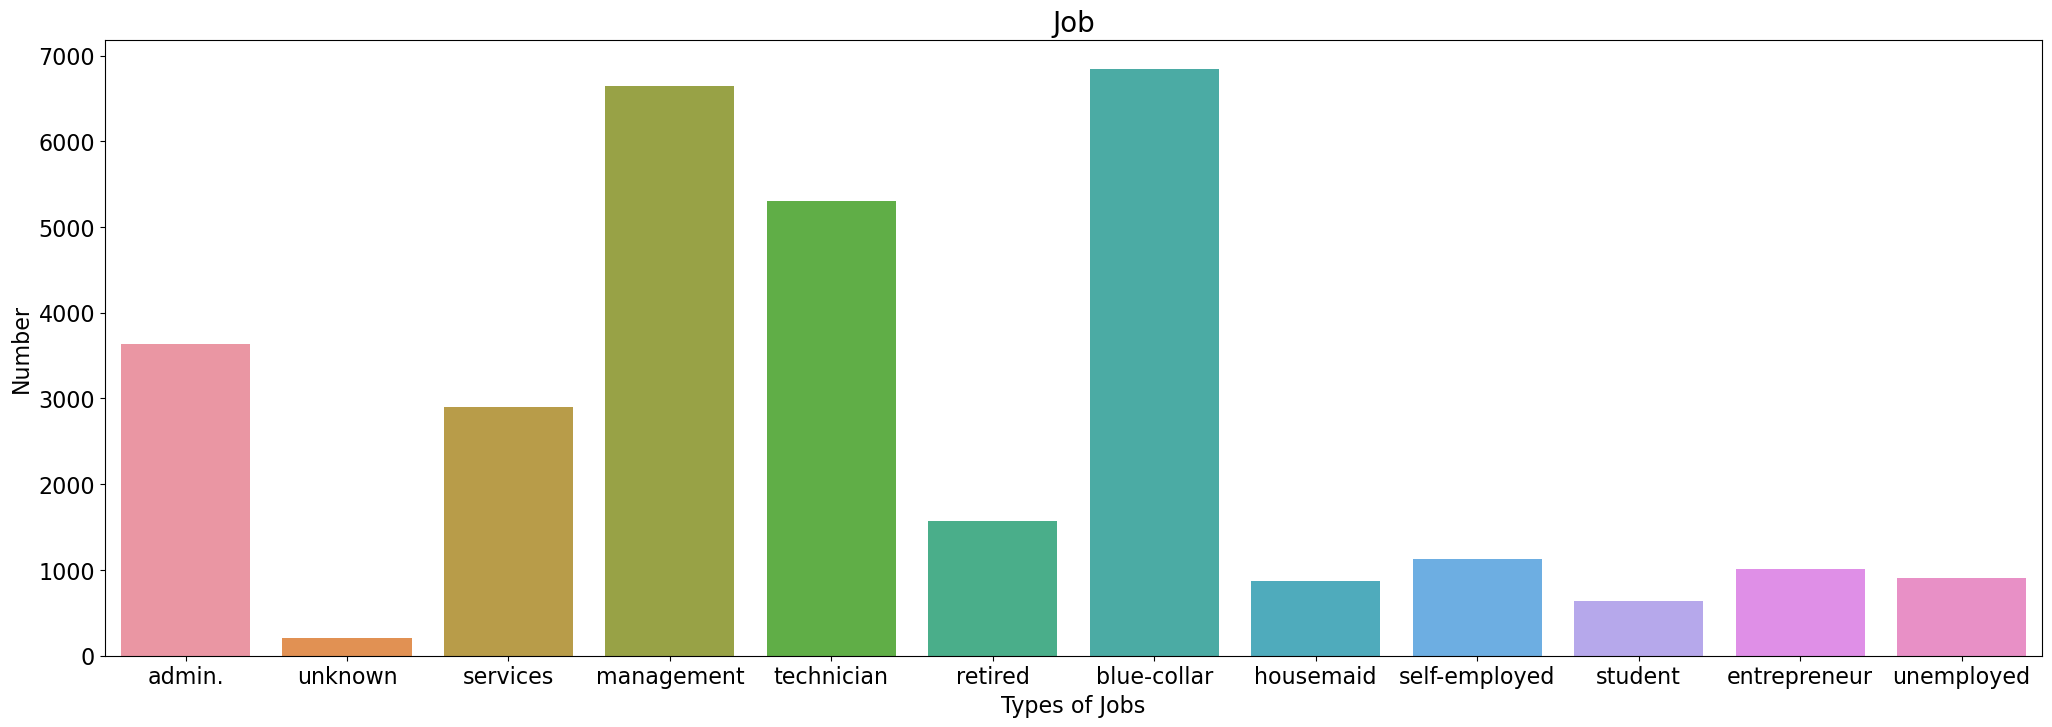

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = train_df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=20)
ax.tick_params(labelsize=16)

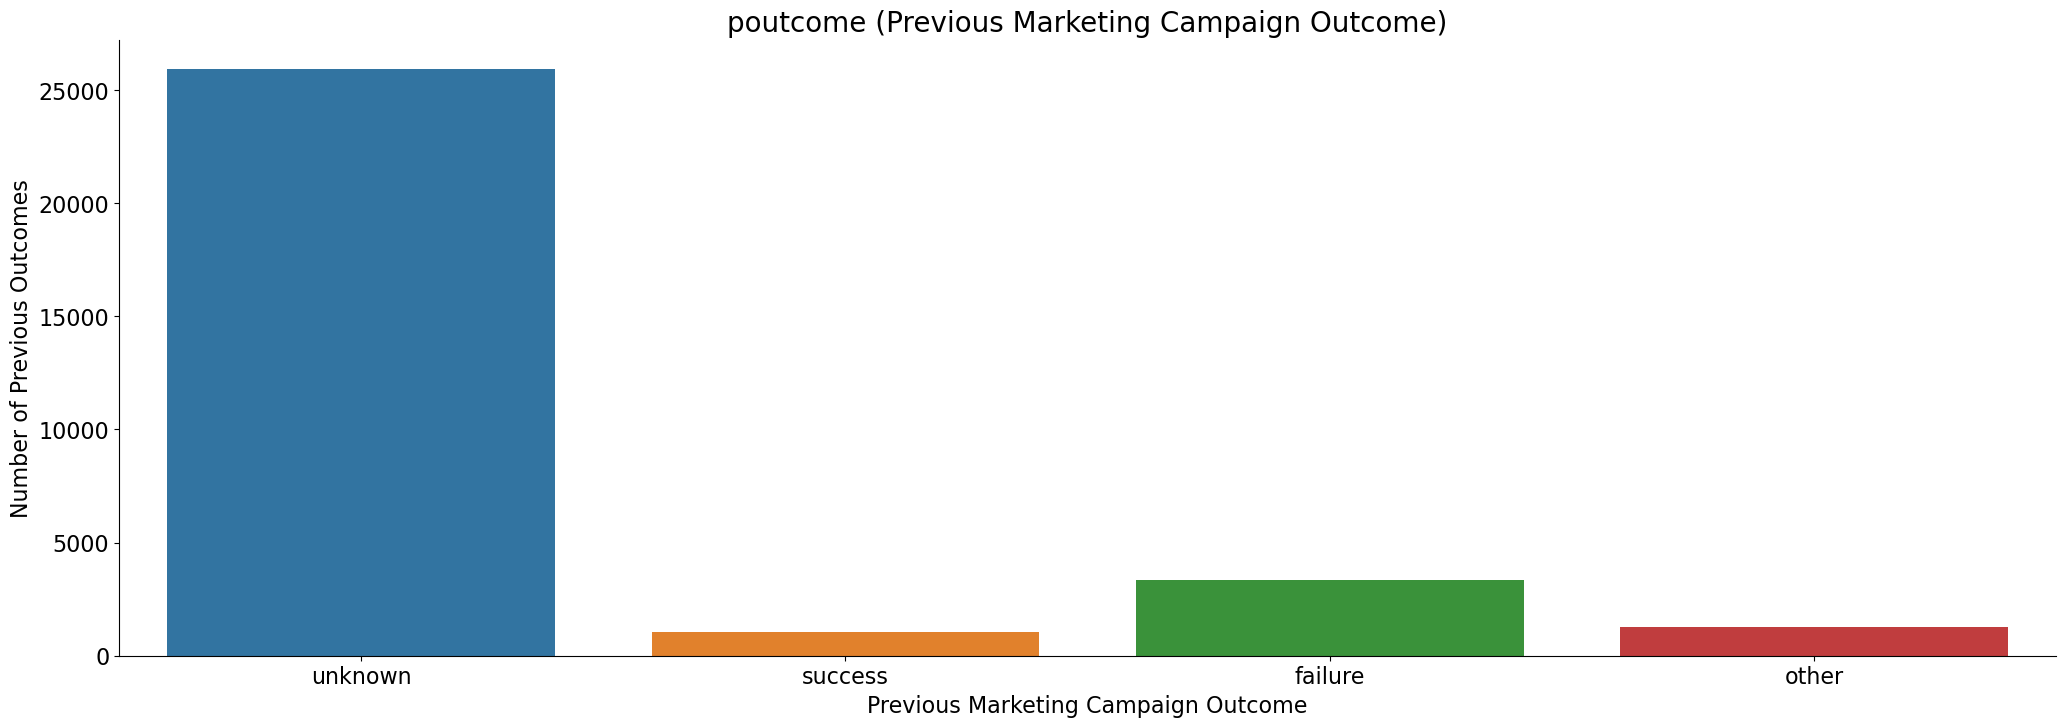

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = train_df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=20)
ax.tick_params(labelsize=16)
sns.despine()

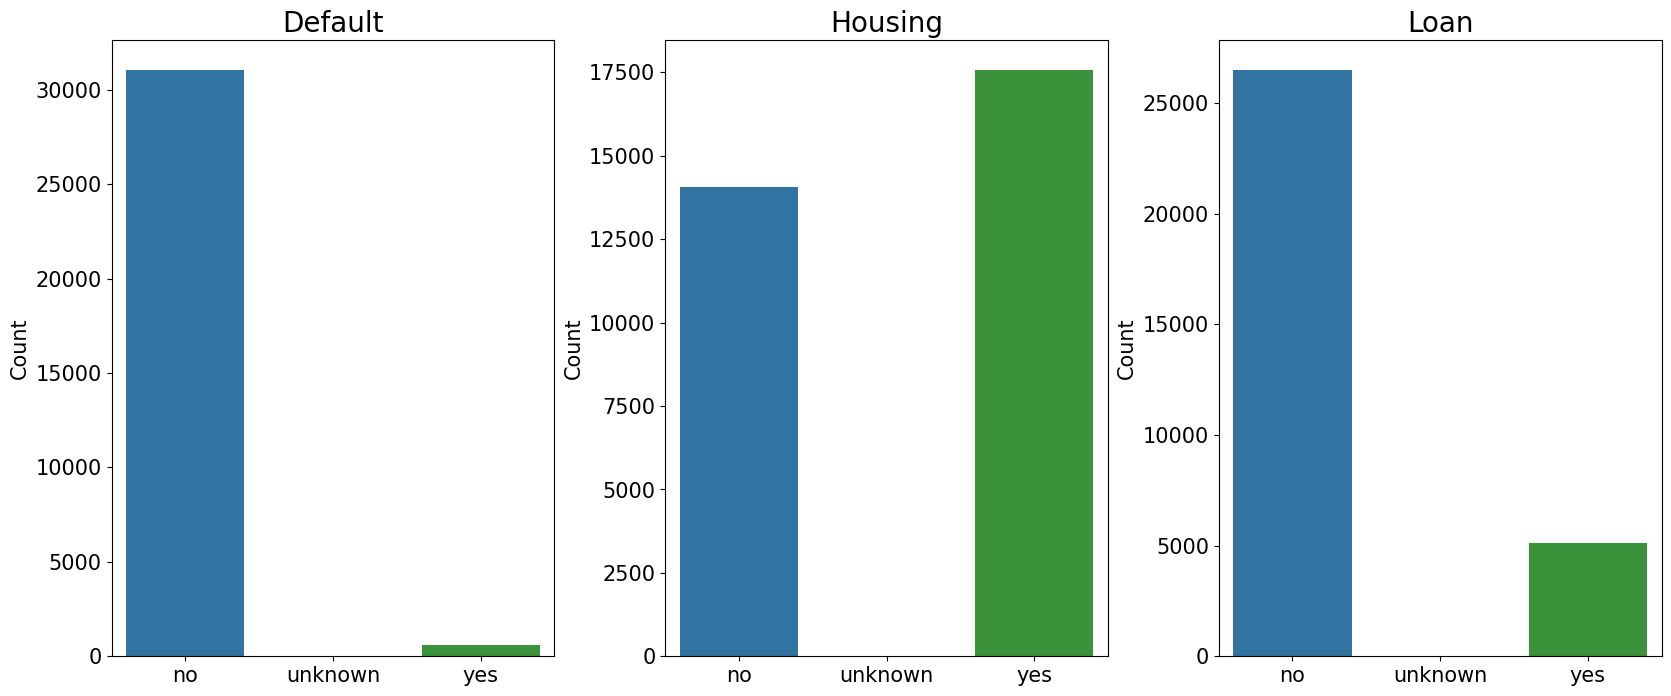

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = train_df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = train_df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = train_df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=20)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)


In [48]:
train_df = pd.concat([train_df,cols_new_cat], axis = 1)

In [49]:
cols_all_cat = list(cols_new_cat.columns)

In [50]:
train_df[cols_all_cat].head()

,job_admin.,job_admin.,job_blue-collar,job_blue-collar,job_entrepreneur,job_entrepreneur,job_housemaid,job_housemaid,job_management,job_management,...,poutcome_other,poutcome_other,poutcome_success,poutcome_success,poutcome_unknown,poutcome_unknown,subscribed_no,subscribed_no,subscribed_yes,subscribed_yes
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,True,True,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False


In [51]:
print('Total number of Features :', len(cols_all_cat+cols_num))
print('Numerical Features :', len(cols_num))
print('Categorical Features : ',len(cols_all_cat))

Total number of Features : 53
Numerical Features : 7
Categorical Features :  46


In [52]:
train_df[cols_all_cat].isnull().sum().sort_values(ascending = False)

job_admin.          0
month_aug           0
month_jul           0
month_jul           0
month_jan           0
                   ..
marital_single      0
marital_married     0
marital_married     0
marital_divorced    0
subscribed_yes      0
Length: 92, dtype: int64

In [59]:
cols_input = cols_num + cols_all_cat
train_df_data = train_df[cols_input + ['Output_Label']]

In [60]:
cols_input

['campaign',
 'pdays',
 'previous',
 'age',
 'balance',
 'day',
 'duration',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'subscribed_no',
 'subscribed_yes']

In [57]:
len(cols_input)

53

In [61]:
train_df_data.head()

,campaign,pdays,previous,age,balance,day,duration,job_admin.,job_admin.,job_blue-collar,...,poutcome_other,poutcome_success,poutcome_success,poutcome_unknown,poutcome_unknown,subscribed_no,subscribed_no,subscribed_yes,subscribed_yes,Output_Label
0,2,-1,0,56,1933,19,44,True,True,False,...,False,False,False,True,True,True,True,False,False,0
1,2,-1,0,31,3,20,91,False,False,False,...,False,False,False,True,True,True,True,False,False,0
2,1,-1,0,27,891,18,240,False,False,False,...,False,False,False,True,True,True,True,False,False,0
3,1,84,3,57,3287,22,867,False,False,False,...,False,True,True,False,False,False,False,True,True,1
4,1,-1,0,31,119,4,380,False,False,False,...,False,False,False,True,True,True,True,False,False,0


In [63]:
train_df_data = train_df_data.sample(n=len(train_df_data), random_state = 42)
train_df_data = train_df_data.reset_index(drop = True)

In [65]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [76]:
train_df_all = train_df_data.drop(test_df.index)

In [78]:
rows_pos = train_df_all.Output_Label == 1
train_df_pos = train_df_all.loc[rows_pos]
train_df_neg = train_df_all.loc[~rows_pos]

train_df = pd.concat([train_df_pos, train_df_neg.sample(n = len(train_df_pos), random_state = 42)],axis = 0)

train_df = train_df.sample(n = len(train_df), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(train_df), calc_prevalence(train_df.Output_Label.values)))

Train balanced prevalence(n = 4156):0.500
